<a href="https://colab.research.google.com/github/phsok10/Aiffel/blob/main/ROITransformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 준비

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# annotation 파일 압축 해제
!unzip /content/drive/MyDrive/Aiffel/dataset/annotation_dota_v1.zip -d /content/

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/valid_annotations/3772.txt  
  inflating: /content/valid_annotations/3773.txt  
  inflating: /content/valid_annotations/3774.txt  
  inflating: /content/valid_annotations/3775.txt  
  inflating: /content/valid_annotations/3776.txt  
  inflating: /content/valid_annotations/3777.txt  
  inflating: /content/valid_annotations/3778.txt  
  inflating: /content/valid_annotations/3779.txt  
  inflating: /content/valid_annotations/378.txt  
 extracting: /content/valid_annotations/3780.txt  
  inflating: /content/valid_annotations/3781.txt  
  inflating: /content/valid_annotations/3783.txt  
  inflating: /content/valid_annotations/3784.txt  
  inflating: /content/valid_annotations/3785.txt  
  inflating: /content/valid_annotations/3786.txt  
  inflating: /content/valid_annotations/3787.txt  
  inflating: /content/valid_annotations/3788.txt  
  inflating: /content/valid_annotations/3789.txt  
  inflating: /content/valid_annotations/379.txt

In [4]:
# 이미지 파일 압축 해제
!unzip /content/drive/MyDrive/Aiffel/dataset/dataset.zip -d /content/

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/validation/labelXml/3957.xml  
  inflating: /content/validation/labelXml/3958.xml  
  inflating: /content/validation/labelXml/3959.xml  
  inflating: /content/validation/labelXml/396.xml  
  inflating: /content/validation/labelXml/3960.xml  
  inflating: /content/validation/labelXml/3961.xml  
  inflating: /content/validation/labelXml/3962.xml  
  inflating: /content/validation/labelXml/3963.xml  
  inflating: /content/validation/labelXml/3964.xml  
  inflating: /content/validation/labelXml/3965.xml  
  inflating: /content/validation/labelXml/3966.xml  
  inflating: /content/validation/labelXml/3967.xml  
  inflating: /content/validation/labelXml/3968.xml  
  inflating: /content/validation/labelXml/3969.xml  
  inflating: /content/validation/labelXml/397.xml  
  inflating: /content/validation/labelXml/3970.xml  
  inflating: /content/validation/labelXml/3971.xml  
  inflating: /content/validation/labelXml/3972.xml  
  inflating:

In [5]:
train_img_dir = '/content/train/images'
valid_img_dir = '/content/validation/images'
train_annotation_dir = '/content/train_annotations'
valid_annotation_dir = '/content/valid_annotations'

# MMRotate 설치

In [6]:
# Install MMCV and MMDetection and MMengine using MIM.
!pip3 install -U openmim
!mim install mmcv-full==1.6.0
!mim install mmdet
!mim install mmengine

# Install MMRotate from the source.
!git clone https://github.com/open-mmlab/mmrotate.git
%cd mmrotate
!pip install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.6 MB/s 
     |████████████████████████████████| 235 kB 8.2 MB/s 
     |████████████████████████████████| 51 kB 7.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html
     |████████████████████████████████| 40.1 MB 8.2 MB/s 
     |████████████████████████████████| 190 kB 4.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html
     |████████████████████████████████| 1.4 MB 4.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html

In [7]:
from mmcv import collect_env
collect_env()

# Check MMRotate installation
import mmrotate
print(mmrotate.__version__)

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

# Check MMengine installation
from mmengine.utils.dl_utils import collect_env
print(collect_env())

0.3.2
2.25.2
11.3
GCC 9.3
OrderedDict([('sys.platform', 'linux'), ('Python', '3.7.14 (default, Sep  8 2022, 00:06:44) [GCC 7.5.0]'), ('CUDA available', True), ('numpy_random_seed', 2147483648), ('GPU 0', 'Tesla P100-PCIE-16GB'), ('CUDA_HOME', '/usr/local/cuda'), ('NVCC', 'Cuda compilation tools, release 11.1, V11.1.105'), ('GCC', 'x86_64-linux-gnu-gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0'), ('PyTorch', '1.12.1+cu113'), ('PyTorch compiling details', 'PyTorch built with:\n  - GCC 9.3\n  - C++ Version: 201402\n  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications\n  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)\n  - OpenMP 201511 (a.k.a. OpenMP 4.5)\n  - LAPACK is enabled (usually provided by MKL)\n  - NNPACK is enabled\n  - CPU capability usage: AVX2\n  - CUDA Runtime 11.3\n  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60

# Faster RCNN

In [8]:
from mmrotate.datasets.builder import ROTATED_DATASETS
from mmrotate.datasets.custom_dota import CustomDOTADataset


@ROTATED_DATASETS.register_module()
class Fair1MDataset(CustomDOTADataset):
    """SAR ship dataset for detection."""
    CLASSES = ('Airplane', 'Car', 'Ship')

In [9]:
!mim download mmrotate --config rotated_faster_rcnn_r50_fpn_1x_dota_le90 --dest .

processing rotated_faster_rcnn_r50_fpn_1x_dota_le90...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.1/158.1 MiB 41.2 MB/s eta 0:00:00
Successfully downloaded rotated_faster_rcnn_r50_fpn_1x_dota_le90-0393aa5c.pth to /content/mmrotate
Successfully dumped rotated_faster_rcnn_r50_fpn_1x_dota_le90.py to /content/mmrotate


In [10]:
from mmcv import Config
cfg = Config.fromfile('/content/mmrotate/rotated_faster_rcnn_r50_fpn_1x_dota_le90.py') ## 변경해야 할 부분. 왼편 폴더에서 경로복사 후 붙여넣기

In [11]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
cfg.dataset_type = 'Fair1MDataset'
cfg.data_root = '/content/'

cfg.data.test.type = 'Fair1MDataset'
cfg.data.test.data_root = '/content/'
cfg.data.test.ann_file = 'valid_annotations/'
cfg.data.test.img_prefix = 'validation/images/'

cfg.data.train.type = 'Fair1MDataset'
cfg.data.train.data_root = '/content/'
cfg.data.train.ann_file = 'train_annotations/'
cfg.data.train.img_prefix = 'train/images/'

cfg.data.val.type = 'Fair1MDataset'
cfg.data.val.data_root = '/content/'
cfg.data.val.ann_file = 'valid_annotations/'
cfg.data.val.img_prefix = 'validation/images/'

# modify num classes of the model in box head
cfg.model.roi_head.bbox_head.num_classes = 3

#################################################################################
# Anchor Parameter Change
cfg.model.rpn_head.anchor_generator.scales=[2]
#################################################################################

# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = '/content/mmrotate/rotated_faster_rcnn_r50_fpn_1x_dota_le90-0393aa5c.pth' ## 변경해야 할 부분. 왼편 폴더에서 경로복사 후 붙여넣기

# Set up working dir to save files and logs.
cfg.work_dir = './tutorial_exps'

cfg.optimizer.lr = 0.001
cfg.lr_config.warmup = None
cfg.runner.max_epochs = 3
cfg.log_config.interval = 10

# Change the evaluation metric since we use customized dataset.
cfg.evaluation.metric = 'mAP'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 1
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 1

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
cfg.device='cuda'

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
dataset_type = 'Fair1MDataset'
data_root = '/content/'
img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(type='RResize', img_scale=(1024, 1024)),
    dict(
        type='RRandomFlip',
        flip_ratio=[0.25, 0.25, 0.25],
        direction=['horizontal', 'vertical', 'diagonal'],
        version='le90'),
    dict(
        type='Normalize',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        to_rgb=True),
    dict(type='Pad', size_divisor=32),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_bboxes', 'gt_labels'])
]
test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(1024, 1024),
        flip=False,
        transforms=[
            dict(type='RResize'),
            dict(
                type=

In [12]:
import mmcv
from mmcv.runner import load_checkpoint

from mmdet.apis import inference_detector, show_result_pyplot
from mmrotate.models import build_detector

import os.path as osp

from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

/usr/local/lib/python3.7/dist-packages/mmdet/models/dense_heads/anchor_head.py:116: UserWarning: DeprecationWarning: `num_anchors` is deprecated, for consistency or also use `num_base_priors` instead
  warnings.warn('DeprecationWarning: `num_anchors` is deprecated, '
2022-09-17 00:45:45,843 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2022-09-17 00:45:50,488 - mmdet - INFO - load checkpoint from local path: /content/mmrotate/rotated_faster_rcnn_r50_fpn_1x_dota_le90-0393aa5c.pth
2022-09-17 00:45:50,634 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([16, 1024]) from checkpoint, the shape in current model is torch.Size([4, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([16]) from checkpoint, the shape in current model is torch.Size([4]).
2022-09-17 00:45:50,640 - mmdet - INFO - Start running, ho

[>>>>>>>>>>>>>>>>>>>>>>>>>>] 7653/7653, 11.5 task/s, elapsed: 668s, ETA:     0s

2022-09-17 01:43:22,007 - mmdet - INFO - 
+----------+--------+--------+--------+-------+
| class    | gts    | dets   | recall | ap    |
+----------+--------+--------+--------+-------+
| Airplane | 13924  | 18989  | 0.868  | 0.812 |
| Car      | 152226 | 332234 | 0.893  | 0.774 |
| Ship     | 27520  | 56434  | 0.593  | 0.438 |
+----------+--------+--------+--------+-------+
| mAP      |        |        |        | 0.675 |
+----------+--------+--------+--------+-------+
2022-09-17 01:43:22,014 - mmdet - INFO - Epoch(val) [1][7653]	mAP: 0.6747
2022-09-17 01:43:27,774 - mmdet - INFO - Epoch [2][10/7958]	lr: 1.000e-03, eta: 1:31:10, time: 0.575, data_time: 0.234, memory: 12383, loss_rpn_cls: 0.0085, loss_rpn_bbox: 0.0117, loss_cls: 0.0642, acc: 97.6074, loss_bbox: 0.0531, loss: 0.1375, grad_norm: 1.2802
2022-09-17 01:43:31,278 - mmdet - INFO - Epoch [2][20/7958]	lr: 1.000e-03, eta: 1:31:07, time: 0.350, data_time: 0.008, memory: 12383, loss_rpn_cls: 0.0164, loss_rpn_bbox: 0.0256, loss_cls:

[>>>>>>>>>>>>>>>>>>>>>>>>>>] 7653/7653, 11.4 task/s, elapsed: 673s, ETA:     0s

2022-09-17 02:40:33,344 - mmdet - INFO - 
+----------+--------+--------+--------+-------+
| class    | gts    | dets   | recall | ap    |
+----------+--------+--------+--------+-------+
| Airplane | 13924  | 18296  | 0.877  | 0.815 |
| Car      | 152226 | 302593 | 0.911  | 0.839 |
| Ship     | 27520  | 61359  | 0.634  | 0.506 |
+----------+--------+--------+--------+-------+
| mAP      |        |        |        | 0.720 |
+----------+--------+--------+--------+-------+
2022-09-17 02:40:33,352 - mmdet - INFO - Epoch(val) [2][7653]	mAP: 0.7202
2022-09-17 02:40:39,218 - mmdet - INFO - Epoch [3][10/7958]	lr: 1.000e-03, eta: 0:45:23, time: 0.585, data_time: 0.249, memory: 12383, loss_rpn_cls: 0.0087, loss_rpn_bbox: 0.0145, loss_cls: 0.0928, acc: 96.3281, loss_bbox: 0.0975, loss: 0.2135, grad_norm: 1.3734
2022-09-17 02:40:42,747 - mmdet - INFO - Epoch [3][20/7958]	lr: 1.000e-03, eta: 0:45:20, time: 0.353, data_time: 0.008, memory: 12383, loss_rpn_cls: 0.0112, loss_rpn_bbox: 0.0194, loss_cls:

[>>>>>>>>>>>>>>>>>>>>>>>>>>] 7653/7653, 11.3 task/s, elapsed: 676s, ETA:     0s

2022-09-17 03:37:52,791 - mmdet - INFO - 
+----------+--------+--------+--------+-------+
| class    | gts    | dets   | recall | ap    |
+----------+--------+--------+--------+-------+
| Airplane | 13924  | 19441  | 0.890  | 0.815 |
| Car      | 152226 | 267069 | 0.918  | 0.850 |
| Ship     | 27520  | 56027  | 0.641  | 0.517 |
+----------+--------+--------+--------+-------+
| mAP      |        |        |        | 0.727 |
+----------+--------+--------+--------+-------+
2022-09-17 03:37:52,797 - mmdet - INFO - Epoch(val) [3][7653]	mAP: 0.7274


In [ ]:
# load tensorboard in colab
%load_ext tensorboard

# see curves in tensorboard
%tensorboard --logdir ./tutorial_exps

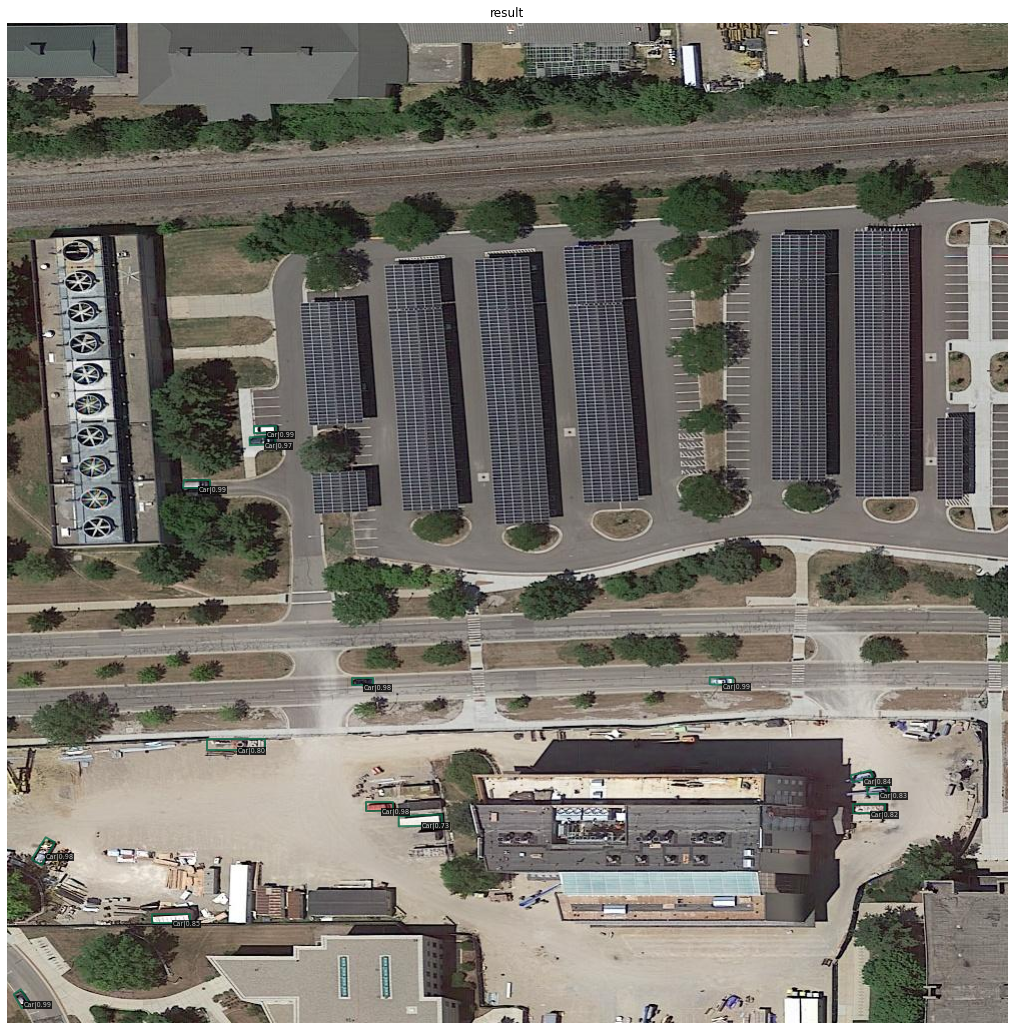

In [13]:
img = mmcv.imread('/content/validation/images/1.tif')
model.cfg = cfg
result = inference_detector(model, img)
show_result_pyplot(model, img, result, score_thr=0.7)

# 체크포인트 로딩 후 재학습

In [ ]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
cfg.dataset_type = 'Fair1MDataset'
cfg.data_root = '/content/'

cfg.data.test.type = 'Fair1MDataset'
cfg.data.test.data_root = '/content/'
cfg.data.test.ann_file = 'validation_annotations/'
cfg.data.test.img_prefix = 'valid/images/'

cfg.data.train.type = 'Fair1MDataset'
cfg.data.train.data_root = '/content/'
cfg.data.train.ann_file = 'train_annotations/'
cfg.data.train.img_prefix = 'train/images/'

cfg.data.val.type = 'Fair1MDataset'
cfg.data.val.data_root = '/content/'
cfg.data.val.ann_file = 'validation_annotations/'
cfg.data.val.img_prefix = 'valid/images/'

#
# modify num classes of the model in box head
cfg.model.roi_head.bbox_head.num_classes = 3


# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = '/content/mmrotate/tutorial_exps/epoch_1.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './tutorial_exps'

cfg.optimizer.lr = 0.001
cfg.lr_config.warmup = None
cfg.runner.max_epochs = 2
cfg.log_config.interval = 10

# Change the evaluation metric since we use customized dataset.
cfg.evaluation.metric = 'mAP'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 2
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 2

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
cfg.device='cuda'

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
dataset_type = 'Fair1MDataset'
data_root = '/content/'
img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(type='RResize', img_scale=(1024, 1024)),
    dict(
        type='RRandomFlip',
        flip_ratio=[0.25, 0.25, 0.25],
        direction=['horizontal', 'vertical', 'diagonal'],
        version='le90'),
    dict(
        type='Normalize',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        to_rgb=True),
    dict(type='Pad', size_divisor=32),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_bboxes', 'gt_labels'])
]
test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(1024, 1024),
        flip=False,
        transforms=[
            dict(type='RResize'),
            dict(
                type=

In [ ]:
import mmcv
from mmcv.runner import load_checkpoint

from mmdet.apis import inference_detector, show_result_pyplot
from mmrotate.models import build_detector

import os.path as osp

from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

/usr/local/lib/python3.7/dist-packages/mmdet/models/dense_heads/anchor_head.py:116: UserWarning: DeprecationWarning: `num_anchors` is deprecated, for consistency or also use `num_base_priors` instead
  warnings.warn('DeprecationWarning: `num_anchors` is deprecated, '
2022-09-14 06:51:59,165 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2022-09-14 06:51:59,170 - mmdet - INFO - load checkpoint from local path: /content/mmrotate/tutorial_exps/epoch_1.pth
2022-09-14 06:51:59,404 - mmdet - INFO - Start running, host: root@f6e55431fdba, work_dir: /content/mmrotate/tutorial_exps
2022-09-14 06:51:59,405 - mmdet - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) CheckpointHook                     
(LOW         ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
(VERY_LOW    ) TensorboardLoggerHook              
 -------------------- 
before_train_

completed: 0, elapsed: 0s

IndexError: ignored

# Oriented RCNN

In [ ]:
from mmrotate.datasets.builder import ROTATED_DATASETS
from mmrotate.datasets.custom_dota import CustomDOTADataset


@ROTATED_DATASETS.register_module()
class Fair1MDataset(CustomDOTADataset):
    """SAR ship dataset for detection."""
    CLASSES = ('Airplane', 'Car', 'Ship')

In [ ]:
!mim download mmrotate --config rotated_faster_rcnn_r50_fpn_1x_dota_le90 --dest .

processing rotated_faster_rcnn_r50_fpn_1x_dota_le90...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.1/158.1 MiB 40.4 MB/s eta 0:00:00
Successfully downloaded rotated_faster_rcnn_r50_fpn_1x_dota_le90-0393aa5c.pth to /content/mmrotate
Successfully dumped rotated_faster_rcnn_r50_fpn_1x_dota_le90.py to /content/mmrotate


In [ ]:
from mmcv import Config
cfg = Config.fromfile('./configs/oriented_rcnn/oriented_rcnn_r50_fpn_1x_dota_le90.py')

In [ ]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
cfg.dataset_type = 'Fair1MDataset'
cfg.data_root = '/content/'

cfg.data.test.type = 'Fair1MDataset'
cfg.data.test.data_root = '/content/'
cfg.data.test.ann_file = 'validation_annotations/'
cfg.data.test.img_prefix = 'valid/images/'

cfg.data.train.type = 'Fair1MDataset'
cfg.data.train.data_root = '/content/'
cfg.data.train.ann_file = 'train_annotations/'
cfg.data.train.img_prefix = 'train/images/'

cfg.data.val.type = 'Fair1MDataset'
cfg.data.val.data_root = '/content/'
cfg.data.val.ann_file = 'validation_annotations/'
cfg.data.val.img_prefix = 'valid/images/'

# modify num classes of the model in box head
cfg.model.roi_head.bbox_head.num_classes = 3
# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = 'rotated_faster_rcnn_r50_fpn_1x_dota_le90-0393aa5c.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './tutorial_exps'

cfg.optimizer.lr = 0.001
cfg.lr_config.warmup = None
cfg.runner.max_epochs = 3
cfg.log_config.interval = 10

# Change the evaluation metric since we use customized dataset.
cfg.evaluation.metric = 'mAP'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 3
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 3

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
cfg.device='cuda'

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

In [ ]:
import mmcv
from mmcv.runner import load_checkpoint

from mmdet.apis import inference_detector, show_result_pyplot
from mmrotate.models import build_detector

import os.path as osp

from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

/usr/local/lib/python3.7/dist-packages/mmdet/models/dense_heads/anchor_head.py:116: UserWarning: DeprecationWarning: `num_anchors` is deprecated, for consistency or also use `num_base_priors` instead
  warnings.warn('DeprecationWarning: `num_anchors` is deprecated, '
2022-09-12 14:49:30,468 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2022-09-12 14:49:30,476 - mmdet - INFO - load checkpoint from local path: rotated_faster_rcnn_r50_fpn_1x_dota_le90-0393aa5c.pth
2022-09-12 14:49:30,601 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for rpn_head.rpn_reg.weight: copying a param with shape torch.Size([12, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([18, 256, 1, 1]).
size mismatch for rpn_head.rpn_reg.bias: copying a param with shape torch.Size([12]) from checkpoint, the shape in current model is torch.Size([18]).
size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape tor

completed: 0, elapsed: 0s

IndexError: ignored

In [ ]:
# load tensorboard in colab
%load_ext tensorboard

# see curves in tensorboard
%tensorboard --logdir ./tutorial_exps

In [ ]:
img = mmcv.imread('/content/train/images/17.tif')
model.cfg = cfg
result = inference_detector(model, img)
show_result_pyplot(model, img, result, score_thr=0.7)

In [ ]:
import torch
import math
from shapely.geometry import Polygon
import matplotlib.patches as patches
from collections import Counter
from glob import glob
import os
from tqdm import tqdm

'''
모델 출력 결과 : x_center, y_center, w, h, angle[radian], class_score
설명 자료 : https://mmrotate.readthedocs.io/en/latest/intro.html
 - Rotation direction : Clockwise
rotated IOU 연산을 위해 Polygon 사용
'''
def rotate_coordinate(prediction):
    x_center, y_center, w, h, angle, class_score = prediction

    x1 = x_center + (-w/2 * math.cos(angle)) + (-h/2 * -math.sin(angle))
    y1 = y_center + (-w/2 * math.sin(angle)) + (-h/2 * math.cos(angle))

    x2 = x_center + (w/2 * math.cos(angle)) + (-h/2 * -math.sin(angle))
    y2 = y_center + (w/2 * math.sin(angle)) + (-h/2 * math.cos(angle))

    x3 = x_center + (w/2 * math.cos(angle)) + (h/2 * -math.sin(angle))
    y3 = y_center + (w/2 * math.sin(angle)) + (h/2 * math.cos(angle))

    x4 = x_center + (-w/2 * math.cos(angle)) + (h/2 * -math.sin(angle))
    y4 = y_center + (-w/2 * math.sin(angle)) + (h/2 * math.cos(angle))
    
    pred_box = Polygon([(x1, y1), (x2, y2), (x3, y3), (x4, y4)])

    return pred_box


'''
pred_box : Polygon([(x1, y1), (x2, y2), (x3, y3), (x4, y4)])
target_box : Polygon([(x1, y1), (x2, y2), (x3, y3), (x4, y4)])
'''
def rotated_intersection_over_union(pred_box, target_box):
    rotated_IOU = pred_box.intersection(target_box).area / pred_box.union(target_box).area

    return rotated_IOU


'''
prediction : [
    array([[x_center, y_center, w, h, angle[radian], class_score(Airplane)],
           [x_center, y_center, w, h, angle[radian], class_score(Airplane)],
           [x_center, y_center, w, h, angle[radian], class_score(Airplane)]]),
    array([[x_center, y_center, w, h, angle[radian], class_score(Car)],
           [x_center, y_center, w, h, angle[radian], class_score(Car)],
           [x_center, y_center, w, h, angle[radian], class_score(Car)]]),
    array([[x_center, y_center, w, h, angle[radian], class_score(Ship)],
           [x_center, y_center, w, h, angle[radian], class_score(Ship)],
           [x_center, y_center, w, h, angle[radian], class_score(Ship)]])
]

pred_box : [Polygon([(x1, y1), (x2, y2), (x3, y3), (x4, y4)]), class_idx, class_score]
target_box : [Polygon([(x1, y1), (x2, y2), (x3, y3), (x4, y4)]), class_idx]
'''
def non_maximum_suppression(pred_bboxes, iou_threshold, score_threshold):
    # score_threshold를 넘는 박스에 대해서만 NMS 수행
    # class_score에 대해 내림차순 정렬
    pred_bboxes = [box for box in pred_bboxes if box[3] > score_threshold]
    pred_bboxes = sorted(pred_bboxes, key=lambda x: x[3], reverse=True)
    pred_bboxes_after_nms = []

    while pred_bboxes:
        chosen_box = pred_bboxes.pop(0)

        pred_bboxes = [
            pred_box
            for pred_box in pred_bboxes
            if pred_box[2] != chosen_box[2]
            or rotated_intersection_over_union(
                chosen_box[1],
                pred_box[1],
            )
            < iou_threshold
        ]

        pred_bboxes_after_nms.append(chosen_box)

    return pred_bboxes_after_nms


'''
pred_box : [image_idx, Polygon([(x1, y1), (x2, y2), (x3, y3), (x4, y4)]), class_idx, class_score]
target_box : [image_idx, Polygon([(x1, y1), (x2, y2), (x3, y3), (x4, y4)]), class_idx]
'''
def calculate_metrics(predictions, targets, iou_threshold, num_classes=3):
    # 클래스 별 AP 값 저장 변수
    average_precisions = []
    F1_scores = []

    # 나눗셈 에러 방지용 상수
    epsilon = 1e-6

    for c in range(num_classes):
        detections = []
        ground_truths = []

        # 클래스 별로 구분
        for prediction in predictions:
            if prediction[2] == c:
                detections.append(prediction)

        for target in targets:
            if target[2] == c:
                ground_truths.append(target)

        # 이미지 별로 구분하기 위해 사용
        amount_bboxes = Counter([gt[0] for gt in ground_truths])

        # We then go through each key, val in this dictionary
        # and convert to the following (w.r.t same example):
        # ammount_bboxes = {0:torch.tensor[0,0,0], 1:torch.tensor[0,0,0,0,0]}
        for key, val in amount_bboxes.items():
            amount_bboxes[key] = torch.zeros(val)

        # class_score를 기준으로 내림차순 정렬
        detections.sort(key=lambda x: x[3], reverse=True)
        TP = torch.zeros((len(detections)))
        FP = torch.zeros((len(detections)))
        total_true_bboxes = len(ground_truths)

        # 이미지에 정답지가 존재하지 않을 경우에 대한 예외 처리
        if total_true_bboxes == 0:
            continue

        for detection_idx, detection in enumerate(detections):
            # 같은 이미지끼리만 예측과 정답을 비교
            ground_truth_img = [
                bbox for bbox in ground_truths if bbox[0] == detection[0]
            ]

            num_gts = len(ground_truth_img)
            best_iou = 0

            for idx, gt in enumerate(ground_truth_img):
                iou = rotated_intersection_over_union(detection[1], gt[1])

                if iou > best_iou:
                    best_iou = iou
                    best_gt_idx = idx

            if best_iou > iou_threshold:
                # only detect ground truth detection once
                if amount_bboxes[detection[0]][best_gt_idx] == 0:
                    # true positive and add this bounding box to seen
                    TP[detection_idx] = 1
                    amount_bboxes[detection[0]][best_gt_idx] = 1
                else:
                    FP[detection_idx] = 1

            # if IOU is lower then the detection is a false positive
            else:
                FP[detection_idx] = 1

        TP_cumsum = torch.cumsum(TP, dim=0)
        FP_cumsum = torch.cumsum(FP, dim=0)
        recalls = TP_cumsum / (total_true_bboxes + epsilon)
        precisions = torch.divide(TP_cumsum, (TP_cumsum + FP_cumsum + epsilon))
        precisions = torch.cat((torch.tensor([1]), precisions))
        recalls = torch.cat((torch.tensor([0]), recalls))
        # torch.trapz for numerical integration
        average_precisions.append(torch.trapz(precisions, recalls))

        recall = TP_cumsum[-1] / (total_true_bboxes + epsilon)
        precision = TP_cumsum[-1] / (TP_cumsum[-1] + TP_cumsum[-1] + epsilon)
        F1_score = 2 * (recall * precision) / (recall + precision)
        F1_scores.append(F1_score)
        
    mAP = sum(average_precisions) / len(average_precisions)
    mean_F1_score = sum(F1_scores) / len(F1_scores)

    return average_precisions, mAP, F1_scores, mean_F1_score


'''
실제 계산하는 부분
'''
def calculate_result(img_dir, annotation_dir, iou_threshold=0.5, score_threshold=0.4, max_len=10):
    model.cfg = cfg

    class_name_to_index = {'Airplane': 0, 'Car': 1, 'Ship': 2}

    annotation_paths = glob(annotation_dir + '/*.txt')

    targets = []
    predictions_after_nms = []
    for image_idx, annotation_path in enumerate(tqdm(annotation_paths)):
        if image_idx == max_len:
            break

        with open(annotation_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                line = line.strip('\n')
                x1, y1, x2, y2, x3, y3, x4, y4, class_name, difficulty = line.split(' ')
                x1, y1, x2, y2 = float(x1), float(y1), float(x2), float(y2)
                x3, y3, x4, y4 = float(x3), float(y3), float(x4), float(y4)
                target_box = Polygon([(x1, y1), (x2, y2), (x3, y3), (x4, y4)])
                class_idx = class_name_to_index[class_name]
                targets.append([image_idx, target_box, class_idx])

        file_name = annotation_path.split('/')[-1].split('.')[0]
        img_name = file_name + '.tif'
        img_paths = os.path.join(img_dir, img_name)

        img = mmcv.imread(img_paths)
        results = inference_detector(model, img)

        predictions_before_nms = []
        for class_idx, result in enumerate(results):
            for bbox in result:
                pred_box = rotate_coordinate(bbox)
                class_score = bbox[-1]
                predictions_before_nms.append([image_idx, pred_box, class_idx, class_score])

        bbox_after_nms = non_maximum_suppression(predictions_before_nms, iou_threshold, score_threshold)
        predictions_after_nms.extend(bbox_after_nms)

        average_precisions, mAP, F1_scores, mean_F1_score = calculate_metrics(predictions_after_nms, targets, iou_threshold, num_classes=3)

    return average_precisions, mAP, F1_scores, mean_F1_score

'''

prediction : [
    array([[x_center, y_center, w, h, angle[radian], class_score(Airplane)],
           [x_center, y_center, w, h, angle[radian], class_score(Airplane)],
           [x_center, y_center, w, h, angle[radian], class_score(Airplane)]]),
    array([[x_center, y_center, w, h, angle[radian], class_score(Car)],
           [x_center, y_center, w, h, angle[radian], class_score(Car)],
           [x_center, y_center, w, h, angle[radian], class_score(Car)]]),
    array([[x_center, y_center, w, h, angle[radian], class_score(Ship)],
           [x_center, y_center, w, h, angle[radian], class_score(Ship)],
           [x_center, y_center, w, h, angle[radian], class_score(Ship)]])
]

pred_box : [Polygon([(x1, y1), (x2, y2), (x3, y3), (x4, y4)]), class_idx, class_score]
target_box : [Polygon([(x1, y1), (x2, y2), (x3, y3), (x4, y4)]), class_idx]
'''

'\n\nprediction : [\n    array([[x_center, y_center, w, h, angle[radian], class_score(Airplane)],\n           [x_center, y_center, w, h, angle[radian], class_score(Airplane)],\n           [x_center, y_center, w, h, angle[radian], class_score(Airplane)]]),\n    array([[x_center, y_center, w, h, angle[radian], class_score(Car)],\n           [x_center, y_center, w, h, angle[radian], class_score(Car)],\n           [x_center, y_center, w, h, angle[radian], class_score(Car)]]),\n    array([[x_center, y_center, w, h, angle[radian], class_score(Ship)],\n           [x_center, y_center, w, h, angle[radian], class_score(Ship)],\n           [x_center, y_center, w, h, angle[radian], class_score(Ship)]])\n]\n\npred_box : [Polygon([(x1, y1), (x2, y2), (x3, y3), (x4, y4)]), class_idx, class_score]\ntarget_box : [Polygon([(x1, y1), (x2, y2), (x3, y3), (x4, y4)]), class_idx]\n'

In [ ]:
img_dir = '/content/train/images'
annotation_dir = '/content/train_annotations'

# targets, predictions = calculate_result(img_dir, annotation_dir, iou_threshold=0.5, score_threshold=0.4, max_len=3)
average_precisions, mAP, F1_scores, mean_F1_score = calculate_result(img_dir, annotation_dir, iou_threshold=0.5, score_threshold=0.4, max_len=30)

# print(targets)
# print(predictions)
print(average_precisions)
print(mAP)
print(F1_scores)
print(mean_F1_score)

  0%|          | 30/16163 [00:13<2:02:23,  2.20it/s]

[tensor(0.7192), tensor(0.8365), tensor(0.7420)]
tensor(0.7659)
[tensor(0.6019), tensor(0.6398), tensor(0.6080)]
tensor(0.6166)
